<a href="https://colab.research.google.com/github/ShauryaDamathia/Visualization_of_Cosmos/blob/main/Visualization_of_Cosmos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Overview**

**This project performs exploratory data analysis (EDA) on a star dataset containing information like temperature, luminosity, radius, magnitude, star type, color, and spectral class. We handle missing values using machine learning-based imputation and visualize patterns using various plots. The goal is to understand how different star types vary based on physical properties and uncover insights about stellar structures and classifications.**

# **Loading Dataset**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('cleaned_star_data.csv')

print(df.head())

  Temperature (K) Luminosity(L/Lo) Radius(R/Ro) Absolute magnitude(Mv)  \
0             NaN              NaN          NaN                    NaN   
1            3042           0.0005       0.1542                   16.6   
2            2600           0.0003        0.102                   18.7   
3            2800           0.0002                               16.65   
4            1939         0.000138        0.103                  20.06   

   Star type Star color Spectral Class  
0        NaN        NaN            NaN  
1        0.0        Red              M  
2        0.0        Red              M  
3        0.0        Red              M  
4        0.0        Red              M  


# **Check Data Summary & Impute missing values**

(240, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         239 non-null    object 
 1   Luminosity(L/Lo)        239 non-null    object 
 2   Radius(R/Ro)            239 non-null    object 
 3   Absolute magnitude(Mv)  239 non-null    object 
 4   Star type               239 non-null    float64
 5   Star color              239 non-null    object 
 6   Spectral Class          239 non-null    object 
dtypes: float64(1), object(6)
memory usage: 13.3+ KB
None
Temperature (K)           1
Luminosity(L/Lo)          1
Radius(R/Ro)              1
Absolute magnitude(Mv)    1
Star type                 1
Star color                1
Spectral Class            1
dtype: int64

Percentage of missing values in each column:
 Temperature (K)           0.416667
Luminosity(L/Lo)          0.416667
Radius(R/Ro)              

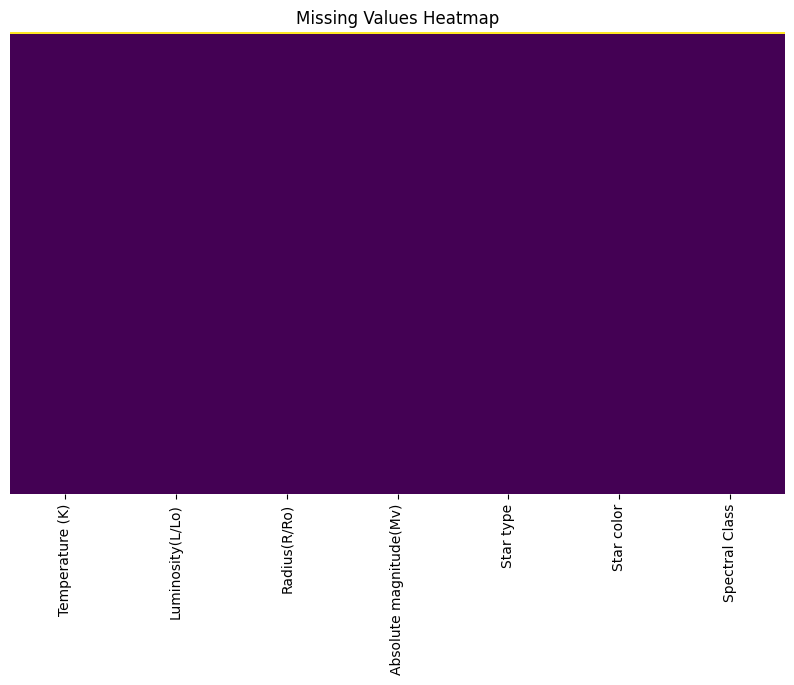

In [9]:
print(df.shape)
print(df.info())

print(df.isnull().sum())

print("\nPercentage of missing values in each column:\n", (df.isnull().sum() / len(df)) * 100)

# Heatmap of missing values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [4]:
#Fill missing value with machine learning algo
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

df_filled = df.copy()

numerical_cols = df_filled.select_dtypes(include=['number']).columns
categorical_cols = df_filled.select_dtypes(exclude=['number']).columns

imputer_num = IterativeImputer(estimator=RandomForestRegressor(), random_state=0)
df_filled[numerical_cols] = imputer_num.fit_transform(df_filled[numerical_cols])

# Fill missing categorical values with mode
for col in categorical_cols:
    df_filled[col] = df_filled[col].fillna(df_filled[col].mode()[0])

print("\nMissing values after imputation:\n", df_filled.isnull().sum())



Missing values after imputation:
 Temperature (K)           0
Luminosity(L/Lo)          0
Radius(R/Ro)              0
Absolute magnitude(Mv)    0
Star type                 0
Star color                0
Spectral Class            0
dtype: int64


# **Univariate Analysis**


Temperature Statistics:
 count      240
unique     226
top       3600
freq         4
Name: Temperature (K), dtype: object


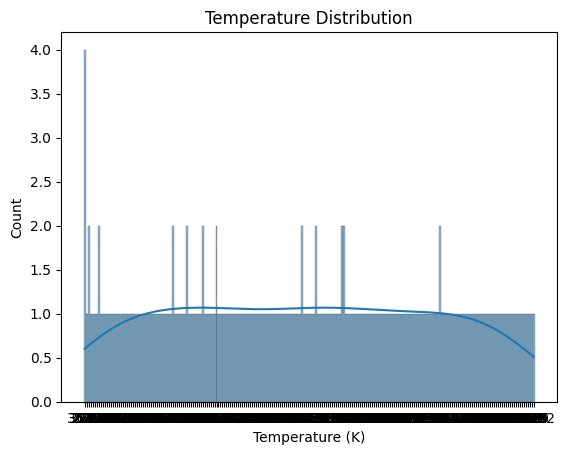


Luminosity Statistics:
 count     240
unique    204
top          
freq        7
Name: Luminosity(L/Lo), dtype: object


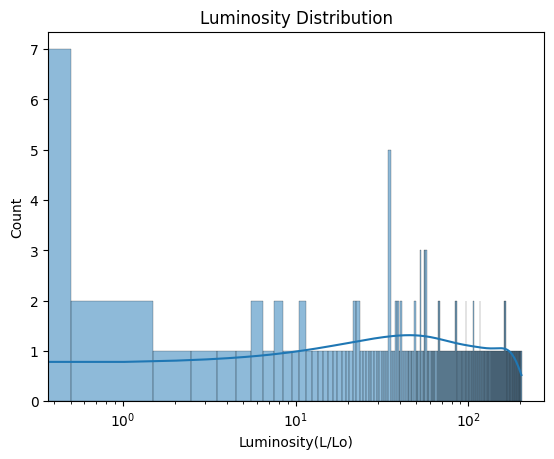


Radius Statistics:
 count     240
unique    212
top          
freq        8
Name: Radius(R/Ro), dtype: object


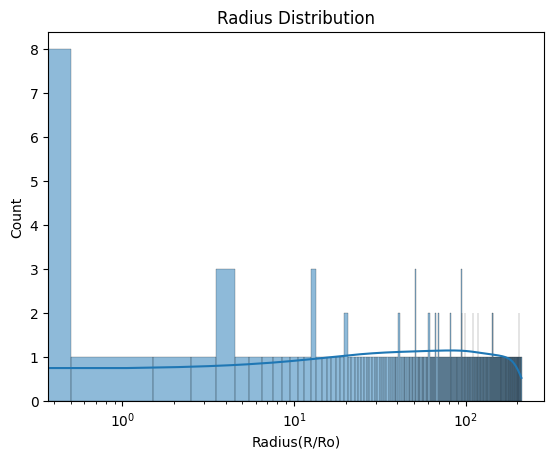


Absolute Magnitude Statistics:
 count     240
unique    223
top          
freq        6
Name: Absolute magnitude(Mv), dtype: object


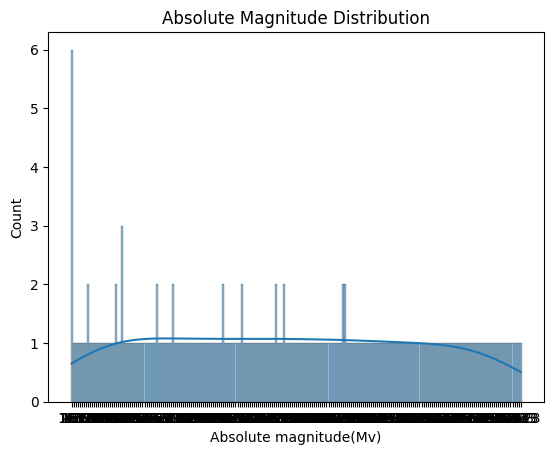


Star Type Distribution:
 Star type
1.00000    40
3.00000    40
2.00000    40
4.00000    40
5.00000    40
0.00000    39
2.51046     1
Name: count, dtype: int64


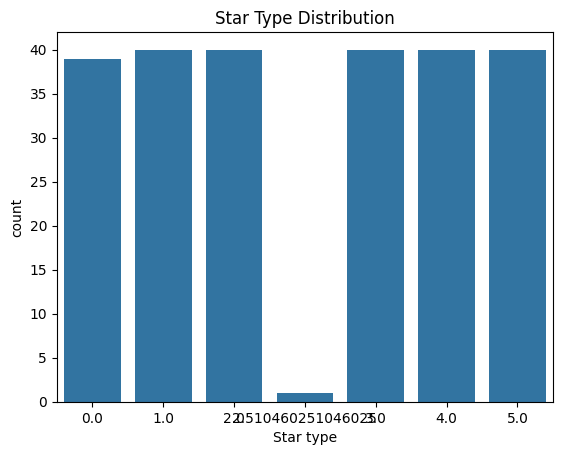


Star Color Distribution:
 Star color
Red             115
Blue             55
Blue-White       40
Yellow-White     13
White            11
                  6
Name: count, dtype: int64


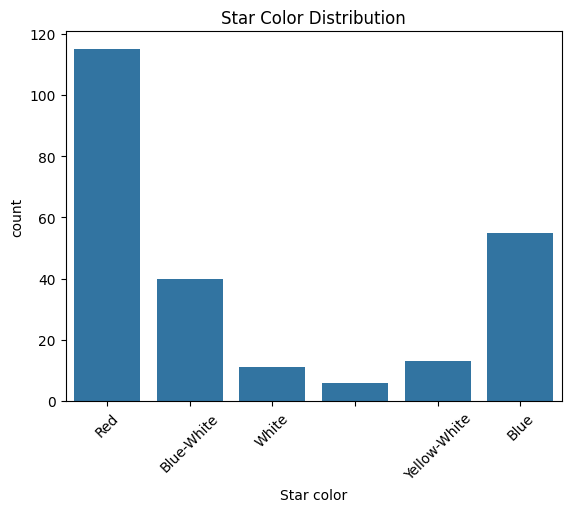


Spectral Class Distribution:
 Spectral Class
M    110
B     46
O     39
A     19
F     17
K      6
       2
G      1
Name: count, dtype: int64


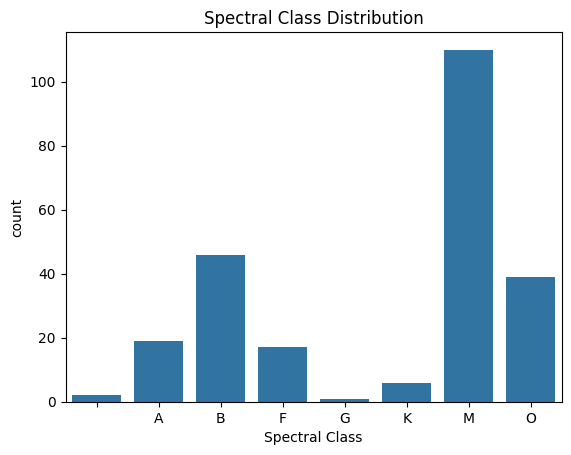

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Temperature
print("\nTemperature Statistics:\n", df_filled['Temperature (K)'].describe())
sns.histplot(df_filled['Temperature (K)'], kde=True)
plt.title('Temperature Distribution')
plt.show()

# Luminosity
print("\nLuminosity Statistics:\n", df_filled['Luminosity(L/Lo)'].describe())
sns.histplot(df_filled['Luminosity(L/Lo)'], kde=True)
plt.title('Luminosity Distribution')
plt.xscale('log')
plt.show()

# Radius
print("\nRadius Statistics:\n", df_filled['Radius(R/Ro)'].describe())
sns.histplot(df_filled['Radius(R/Ro)'], kde=True)
plt.title('Radius Distribution')
plt.xscale('log')
plt.show()

# Absolute Magnitude
print("\nAbsolute Magnitude Statistics:\n", df_filled['Absolute magnitude(Mv)'].describe())
sns.histplot(df_filled['Absolute magnitude(Mv)'], kde=True)
plt.title('Absolute Magnitude Distribution')
plt.show()

# Star Type
print("\nStar Type Distribution:\n", df_filled['Star type'].value_counts())
sns.countplot(x='Star type', data=df_filled)
plt.title('Star Type Distribution')
plt.show()

# Star Color
print("\nStar Color Distribution:\n", df_filled['Star color'].value_counts())
sns.countplot(x='Star color', data=df_filled)
plt.title('Star Color Distribution')
plt.xticks(rotation=45)
plt.show()

# Spectral Class
print("\nSpectral Class Distribution:\n", df_filled['Spectral Class'].value_counts())
sns.countplot(x='Spectral Class', data=df_filled, order=sorted(df_filled['Spectral Class'].unique()))
plt.title('Spectral Class Distribution')
plt.show()


# **Bivariate Analysis**

### **Star Type by Spectral Class**


Star Type by Spectral Class:
 Spectral Class  Star type
                5.00000       2
A               3.00000      10
                2.00000       7
                5.00000       2
B               2.00000      24
                3.00000      13
                5.00000       7
                4.00000       2
F               2.00000       9
                3.00000       8
G               5.00000       1
K               3.00000       4
                5.00000       2
M               1.00000      40
                0.00000      39
                5.00000      21
                4.00000       9
                2.51046       1
O               4.00000      29
                3.00000       5
                5.00000       5
Name: count, dtype: int64


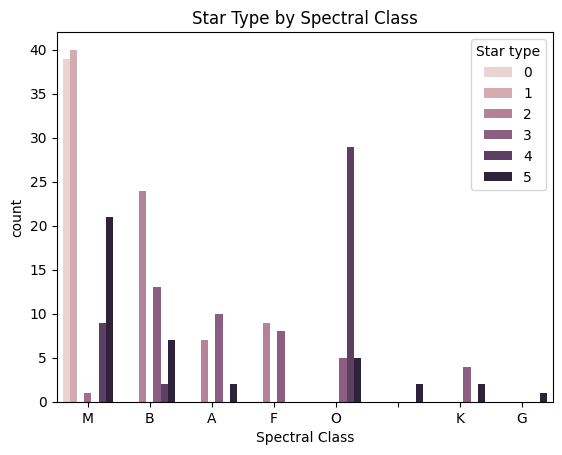

In [6]:
print("\nStar Type by Spectral Class:\n", df_filled.groupby('Spectral Class')['Star type'].value_counts())

sns.countplot(x='Spectral Class', hue='Star type', data=df_filled)
plt.title('Star Type by Spectral Class')
plt.show()

### **Star Type by Star Color**


Star Type by Star Color:
 Star color    Star type
              3.00000       3
              1.00000       1
              2.00000       1
              4.00000       1
Blue          4.00000      30
              2.00000      13
              5.00000       7
              3.00000       5
Blue-White    3.00000      20
              2.00000      14
              5.00000       6
Red           0.00000      39
              1.00000      39
              5.00000      25
              4.00000       9
              2.00000       1
              2.51046       1
              3.00000       1
White         2.00000       7
              3.00000       2
              5.00000       2
Yellow-White  3.00000       9
              2.00000       4
Name: count, dtype: int64


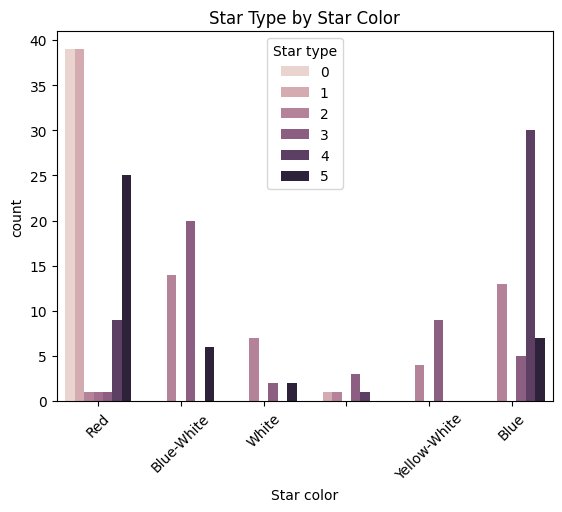

In [7]:
print("\nStar Type by Star Color:\n", df_filled.groupby('Star color')['Star type'].value_counts())

sns.countplot(x='Star color', hue='Star type', data=df_filled)
plt.title('Star Type by Star Color')
plt.xticks(rotation=45)
plt.show()

### **Star Type by Luminosity Group**

/tmp/ipython-input-16-4223191336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['Luminosity Group'] = pd.qcut(df_filled['Luminosity(L/Lo)'],
/tmp/ipython-input-16-4223191336.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_filled.groupby('Luminosity Group')['Star type'].value_counts())



Star Type by Luminosity Group:
 Luminosity Group  Star type
Low               0.0          31
                  2.0          23
                  1.0           5
                  3.0           0
                  4.0           0
                  5.0           0
Medium            1.0          33
                  2.0          16
                  0.0           7
                  3.0           2
                  4.0           0
                  5.0           0
High              3.0          35
                  5.0          12
                  4.0          11
                  0.0           0
                  1.0           0
                  2.0           0
Very High         5.0          28
                  4.0          27
                  3.0           3
                  0.0           0
                  1.0           0
                  2.0           0
Name: count, dtype: int64


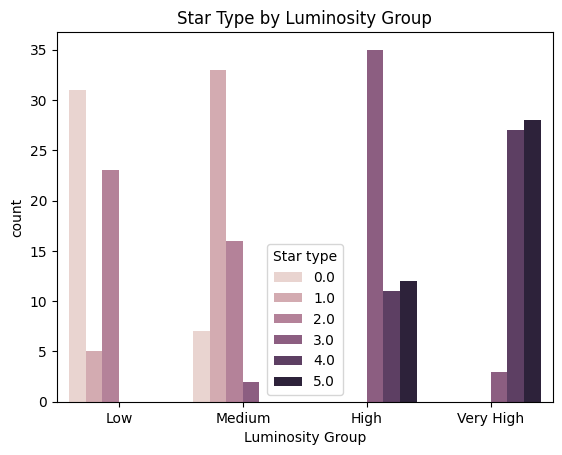

In [16]:
df_filled['Luminosity(L/Lo)'] = pd.to_numeric(df_filled['Luminosity(L/Lo)'], errors='coerce')
df_filled = df_filled.dropna(subset=['Luminosity(L/Lo)'])
df_filled['Luminosity Group'] = pd.qcut(df_filled['Luminosity(L/Lo)'],
                                       q=4,
                                       labels=['Low', 'Medium', 'High', 'Very High'])

print("\nStar Type by Luminosity Group:\n",
      df_filled.groupby('Luminosity Group')['Star type'].value_counts())

sns.countplot(x='Luminosity Group', hue='Star type', data=df_filled)
plt.title('Star Type by Luminosity Group')
plt.show()

### **Star Type by Spectral Class and Color**


Star Type by Spectral Class and Star Color:
 Spectral Class  Star color    Star type
                Blue          5.00000       1
                Red           5.00000       1
A                             2.00000       1
                Blue-White    3.00000       9
                              2.00000       3
                White         2.00000       3
                              5.00000       2
                              3.00000       1
B                             3.00000       1
                              4.00000       1
                Blue          2.00000      13
                              4.00000       1
                              5.00000       1
                Blue-White    2.00000      11
                              3.00000      11
                              5.00000       6
                White         3.00000       1
F                             3.00000       1
                Red           2.00000       1
                White         2.00000   

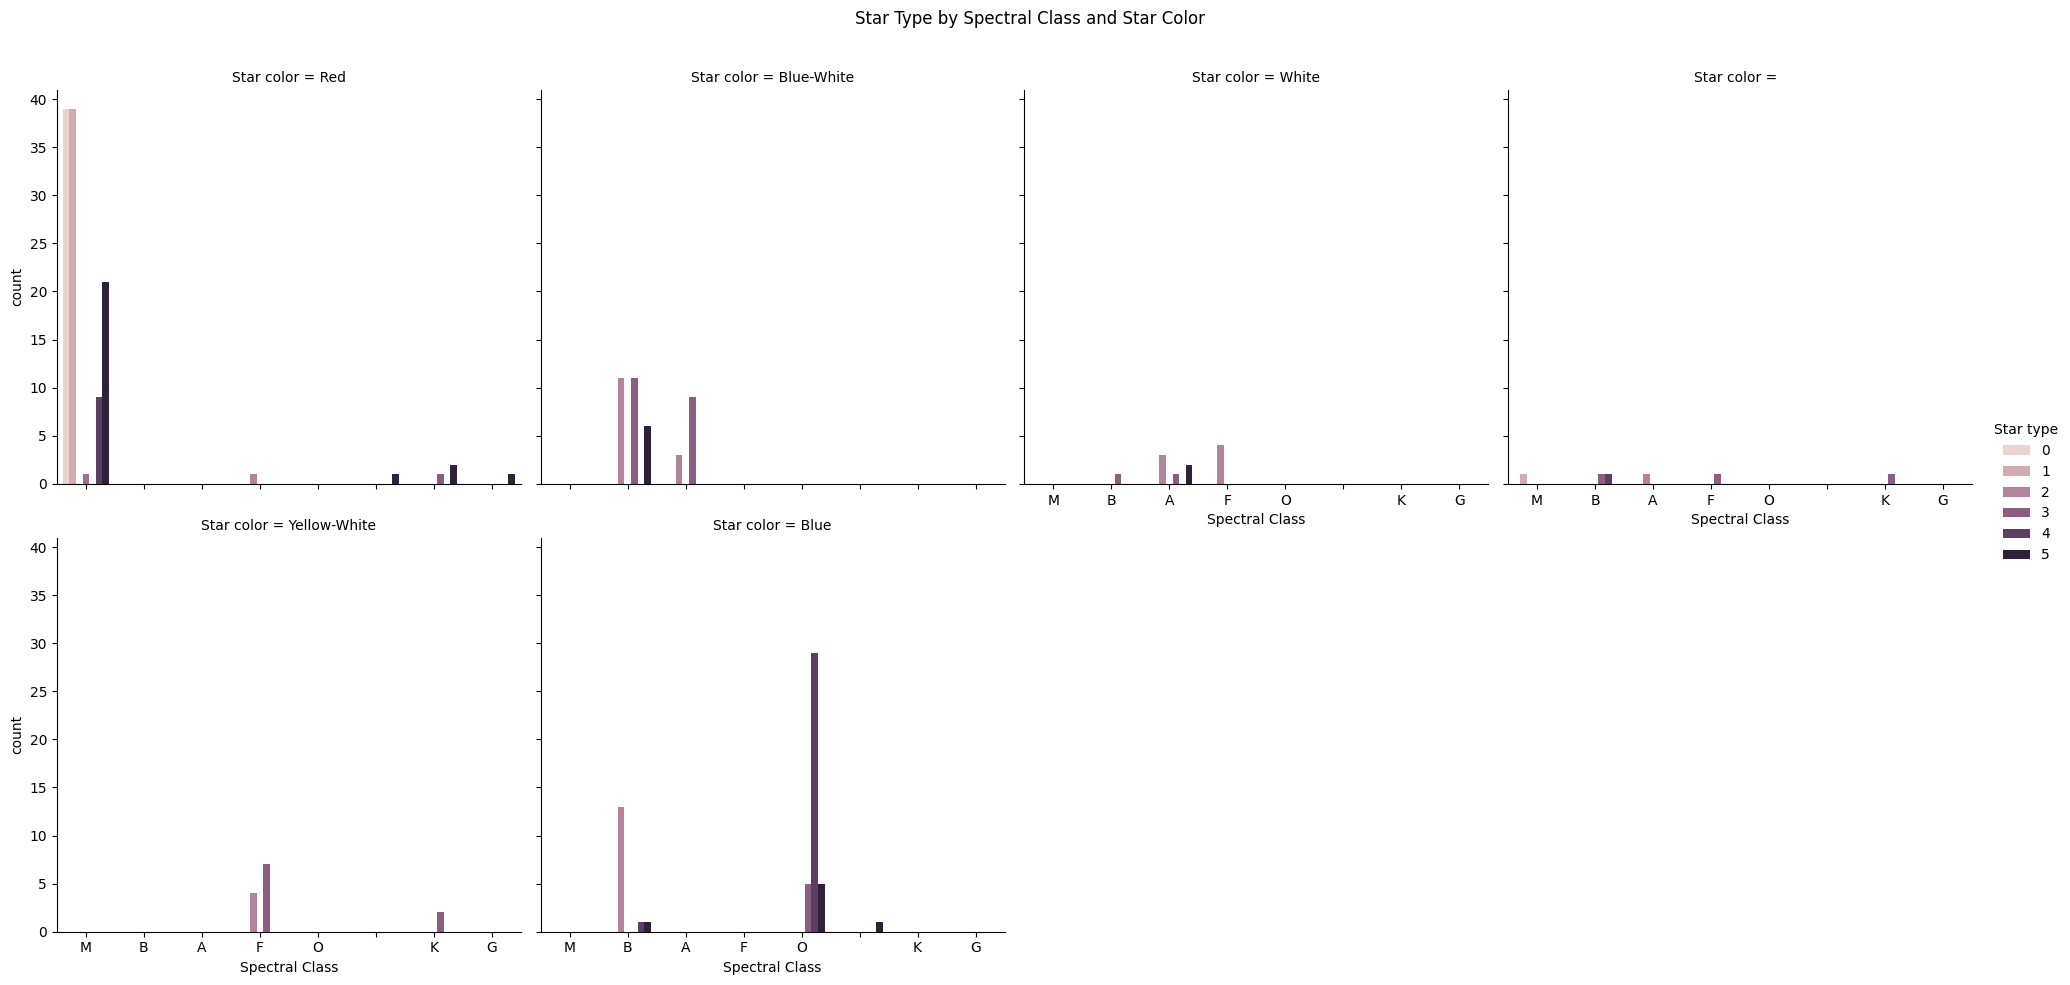

In [14]:
print("\nStar Type by Spectral Class and Star Color:\n", df_filled.groupby(['Spectral Class', 'Star color'])['Star type'].value_counts())

sns.catplot(x='Spectral Class', hue='Star type', col='Star color', kind='count', data=df_filled, col_wrap=4)
plt.subplots_adjust(top=0.9)
plt.suptitle('Star Type by Spectral Class and Star Color')
plt.show()

# **Insight from Analysis Section**

1) Spectral Class & Star Type: Most brown and red dwarfs are concentrated in spectral classes 'M' and 'K', while higher star types like supergiants and hypergiants are mostly found in spectral classes 'O' and 'B'.

2) Luminosity Patterns: Stars with extremely high luminosity tend to belong to advanced stages like Supergiants or Hypergiants, while lower luminosity is characteristic of dwarfs.

3) Combined Size Score: A calculated metric combining radius and temperature showed that higher values correspond to more evolved or massive star types.

# **Survival analysis**

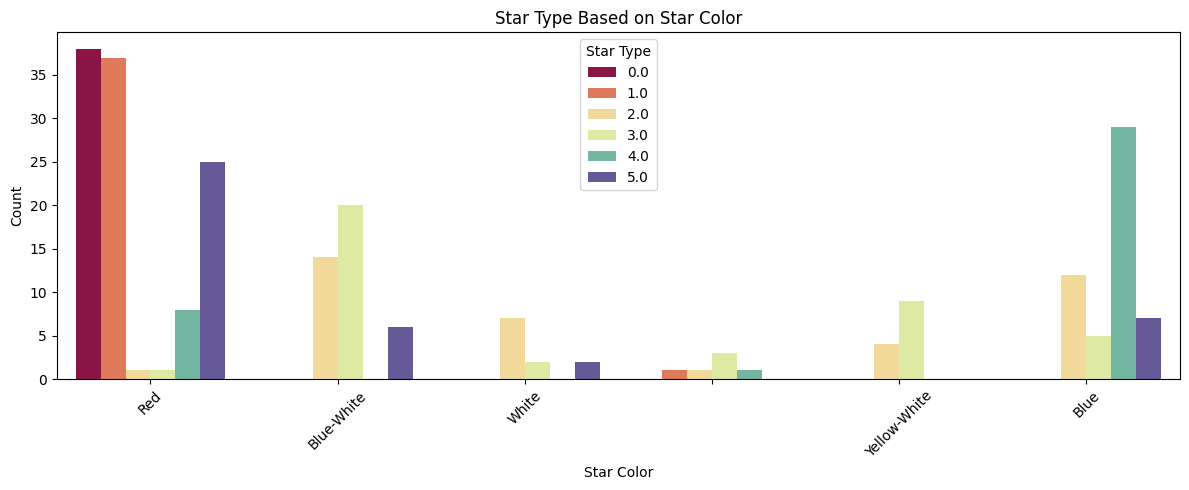

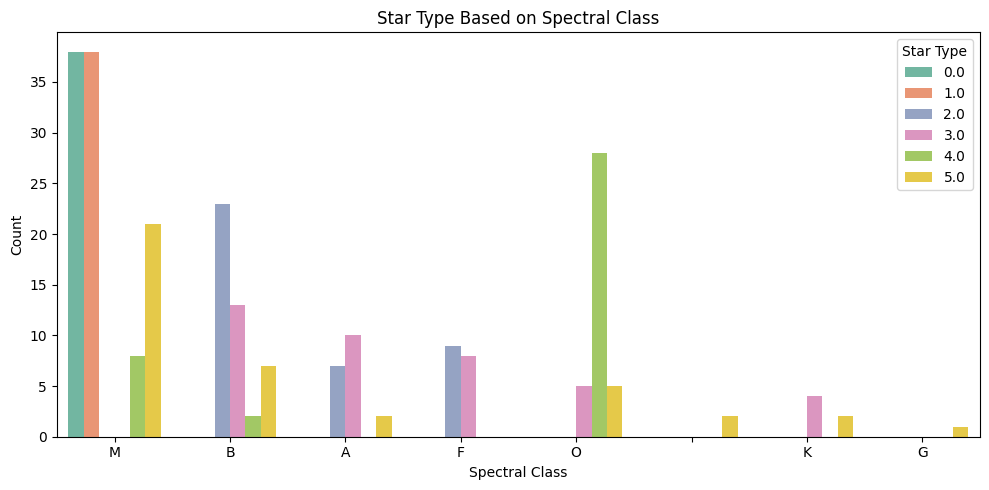

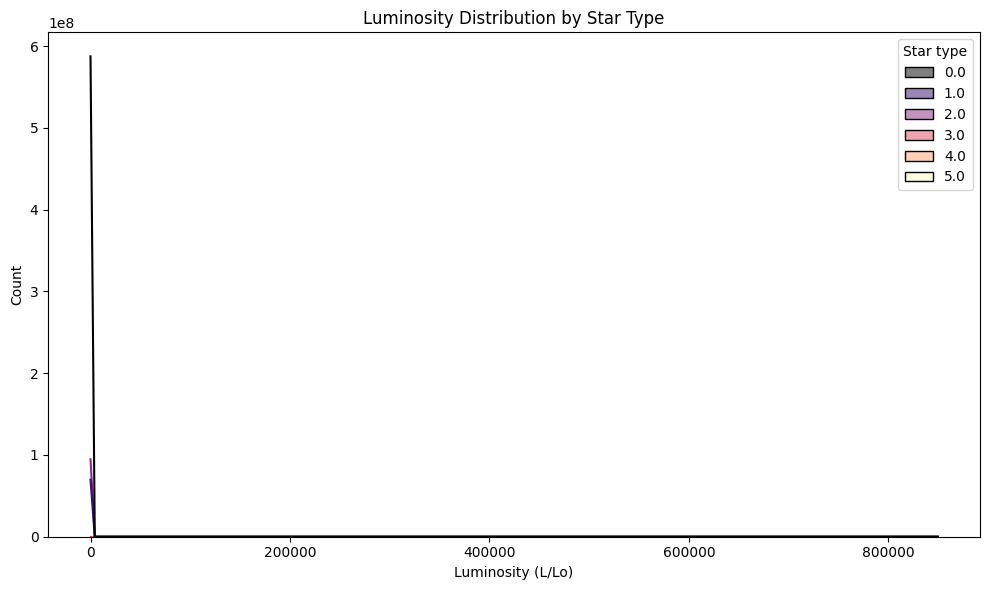

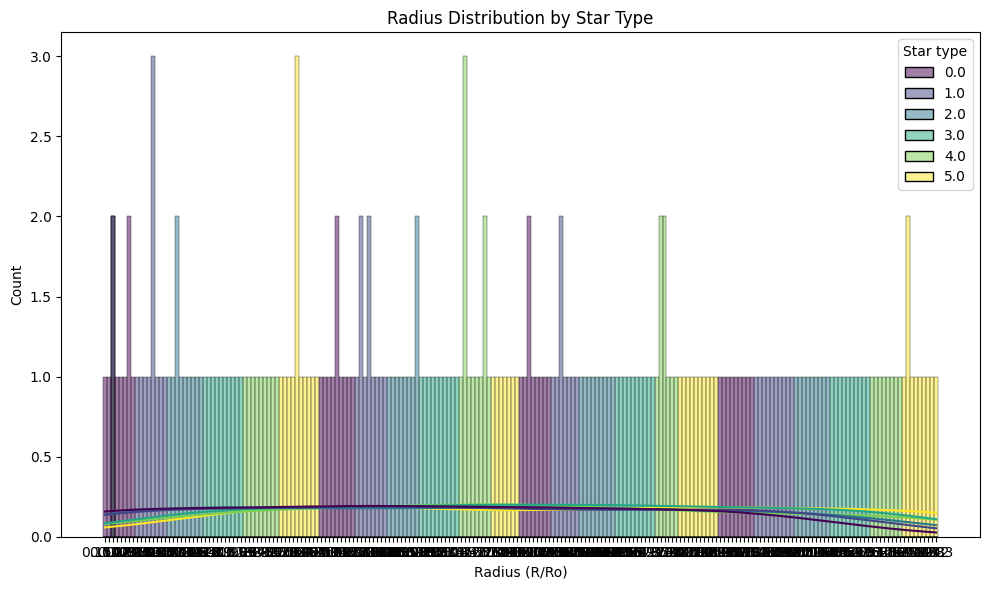

/tmp/ipython-input-19-3422183208.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filled['size_score'] = df_filled['Radius(R/Ro)'] + df_filled['Temperature (K)']/10000


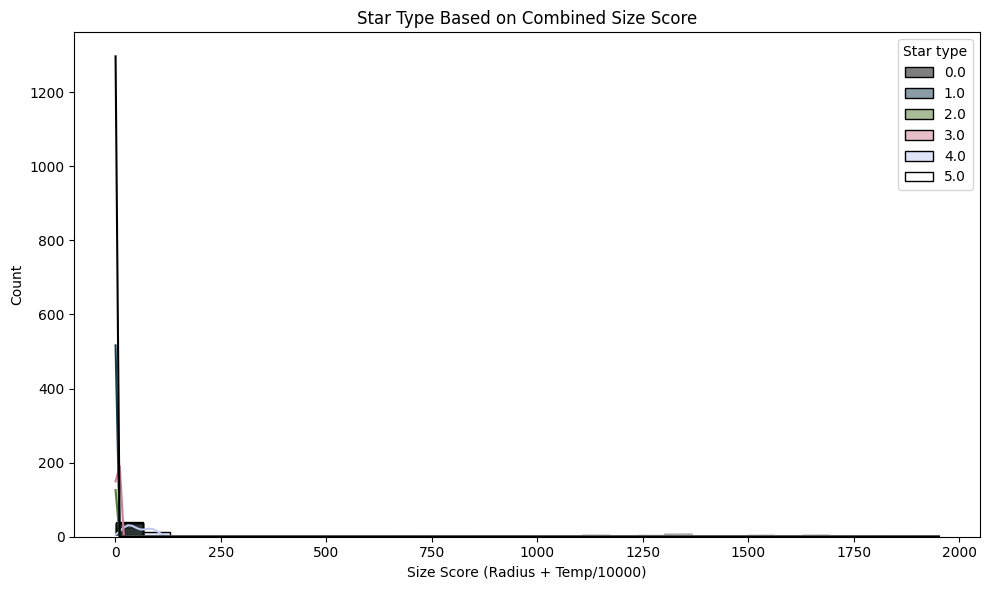

In [19]:
# Star Type by Star Color
plt.figure(figsize=(12, 5))
sns.countplot(x='Star color', hue='Star type', data=df_filled, palette='Spectral')
plt.title('Star Type Based on Star Color')
plt.xticks(rotation=45)
plt.xlabel('Star Color')
plt.ylabel('Count')
plt.legend(title='Star Type')
plt.tight_layout()
plt.show()

# Star Type by Spectral Class
plt.figure(figsize=(10, 5))
sns.countplot(x='Spectral Class', hue='Star type', data=df_filled, palette='Set2')
plt.title('Star Type Based on Spectral Class')
plt.xlabel('Spectral Class')
plt.ylabel('Count')
plt.legend(title='Star Type')
plt.tight_layout()
plt.show()

# Star Type Based on Luminosity
plt.figure(figsize=(10, 6))
sns.histplot(df_filled, x='Luminosity(L/Lo)', hue='Star type', bins=30, kde=True, palette='magma')
plt.title('Luminosity Distribution by Star Type')
plt.xlabel('Luminosity (L/Lo)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Star Type Based on Radius
plt.figure(figsize=(10, 6))
sns.histplot(df_filled, x='Radius(R/Ro)', hue='Star type', bins=30, kde=True, palette='viridis')
plt.title('Radius Distribution by Star Type')
plt.xlabel('Radius (R/Ro)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Combined Feature: Size Score (Radius + normalized Temp)
df_filled['Temperature (K)'] = pd.to_numeric(df_filled['Temperature (K)'], errors='coerce')
df_filled['Radius(R/Ro)'] = pd.to_numeric(df_filled['Radius(R/Ro)'], errors='coerce')
df_filled = df_filled.dropna(subset=['Temperature (K)', 'Radius(R/Ro)'])

df_filled['size_score'] = df_filled['Radius(R/Ro)'] + df_filled['Temperature (K)']/10000

plt.figure(figsize=(10, 6))
sns.histplot(df_filled, x='size_score', hue='Star type', bins=30, kde=True, palette='cubehelix')
plt.title('Star Type Based on Combined Size Score')
plt.xlabel('Size Score (Radius + Temp/10000)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()